# ICD - Projeto Final: Student Alcohol Consumption

## By:
     Fernanda Carolina da Silva Pereira 
     Euller Saez Lage Silva 
     Diego Pereira
     
## External info:
    
[Link p/ Video](https://bit.ly/video-apresentacao-ICD-21-2)

[Repositório no Github](https://github.com/ferprr/data-science-project)

## Introdução

Neste trabalho vamos analisar características que se relacionam ao consumo de álcool de estudantes do Ensino Médio.

## Motivação

Entender como o consumo de álcool pode afetar o desempenho dos estudantes de diferentes idades.

## Dados Utilizados

Para a realização deste projeto, foi necessário utilizar alguns conjuntos de dados de domínio público. Nesta seção iremos entrar em mais detalhes sobre as bases utilizadas.

### Alcohol Consumption

**Descrição:** Conjunto de dados contendo informações sobre consumo de álcool entre estudantes de 15 a 22 anos em Portugal. Inclui informações sobre notas, estrutura familiar, faltas, reprovações, idade e gênero binário dos participantes.

**Fonte:** [Alcohol Consumption] (https://www.kaggle.com/uciml/student-alcohol-consumption)

## Perguntas

### 1 - Qual a influência do consumo de álcool nas notas dos alunos?


### 2 - Qual a  influência do consumo de álcool nas faltas dos alunos na escola?


### 3 - Qual a influência da quantidade de tempo livre no consumo de álcool dos alunos?

## Limpeza dos Dados

As bases de dados selecionadas possuem alguns dados nos quais não estamos interessados e que podemos remover para melhorar o desempenho e facilitar o trabalho.

In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns
sns.set()

# Tamanho default das figuras
matplotlib.rcParams['figure.figsize'] = (15.0, 9.0)

# Carregando dataset
alcohol_consumption = pd.read_csv('../databases/student-mat.zip', compression='zip')

# Definindo a chave "aluno"
alcohol_consumption_aux = alcohol_consumption
alcohol_consumption_aux.insert(loc=0, column='aluno', value=alcohol_consumption_aux.set_index(["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"]).index.factorize()[0]+1)

# Removendo alunos duplicados
alcohol_consumption_aux.drop_duplicates(subset=['aluno'])

# Drop missing values
alcohol_consumption_aux.dropna(inplace=True)
alcohol_consumption_aux.reset_index(drop=True, inplace=True)

alcohol_consumption = alcohol_consumption_aux
alcohol_consumption

,aluno,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,GP,F,18,U,GT3,A,4,4,at_home,...,4,3,4,1,1,3,6,5,6,6
1,2,GP,F,17,U,GT3,T,1,1,at_home,...,5,3,3,1,1,3,4,5,5,6
2,3,GP,F,15,U,LE3,T,1,1,at_home,...,4,3,2,2,3,3,10,7,8,10
3,4,GP,F,15,U,GT3,T,4,2,health,...,3,2,2,1,1,5,2,15,14,15
4,5,GP,F,16,U,GT3,T,3,3,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,387,MS,M,20,U,LE3,A,2,2,services,...,5,5,4,4,5,4,11,9,9,9
391,388,MS,M,17,U,LE3,T,3,1,services,...,2,4,5,3,4,2,3,14,16,16
392,389,MS,M,21,R,GT3,T,1,1,other,...,5,5,3,3,3,3,3,10,8,7
393,390,MS,M,18,R,LE3,T,3,2,services,...,4,4,1,3,4,5,0,11,12,10


### Legenda para colunas do dataset


- school - estudantes (binário: 'GP' - Gabriel Pereira ou 'MS' - Mousinho da Silveira)
- sex - sexo (binário: 'F' - feminino ou 'M' - masculino)
- age - idade (numérico: de 15 a 22)
- address - tipo de endereço de casa (binário: 'U' - urbano ou 'R' - rural)
- famsize - tamanho  da família (binário: 'LE3' - menor ou igual a 3 ou 'GT3' - maior que 3)
- Pstatus - estado de coabitação dos pais (binário: 'T' - vivendo juntos ou 'A' - separados)
- Medu - educação da mãe (numérico: 0 - nenhum, 1 - educação primária (4 ano), 2 – 5 a 9 ano, 3 – educação secundária ou 4 – ensino superior)
- Fedu - educação do pai  (numérico: 0 - nenhum, 1 - educação primária (4 ano), 2 – 5 a 9 ano, 3 – educação secundária ou 4 – ensino superior)
- Mjob - trabalho da mãe (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') 
- Fjob - trabalho do pai (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') 
- reason - razão para escolher esta escola (nominal: close to 'home', school 'reputation', 'course' preference or 'other') 
- guardian - responsável pelo aluno (nominal: 'mother', 'father' ou 'other')
- traveltime - tempo de viagem de casa para escola (numérico: 1 - <15 min., 2 - 15 a 30 min., 3 - 30 min. a 1 hour, ou 4 - >1 hora)
- studytime - tempo de estudo semanal (numérico: 1 - <2 horas, 2 - 2 a 5 horas, 3 - 5 a 10 horas, ou 4 - >10 horas)
- failures - número de reprovações em aulas anteriores (numérico: n se 1<=n<3, se não, 4)
- schoolsup - apoio educacional extra (binário: sim ou não)
- famsup - apoio educacional familiar (binário: sim ou não)
- paid - aulas extras pagas dentro da disciplina do curso (Matemática ou Português) (binário: sim ou não)
- activities - atividades extra-curriculares (binário: sim ou não)
- nursery - frequentou a creche (binário: sim ou não)
- higher - quer fazer ensino superior (binário: sim ou não)
- internet - acesso à nternet em casa (binário: sim ou não)
- romantic - em relacionamento amoroso (binário: sim ou não)
- famrel - qualidade das relações familiares (numérico: de 1 - muito ruim a 5 - excelente)
- freetime - tempo livre após escola (numérico: de 1 - muito baixo a 5 - muito alto)
- goout - saídas com amigos (numérico: de 1 - muito baixo a 5 - muito alto)
- Dalc - consumo de álcool em dias úteis (numérico: de 1 - muito baixo a 5 - muito alto)
- Walc - consumo de álcool em finais de semana (numérico: de 1 - muito baixo a 5 - muito alto)
- health - situação de saúde atual (numérico: de 1 - muito ruim a 5 - excelente)
- absences - número de faltas (numérico: de 0 a 93)

Notas relacionadas às disciplinas Matemática ou Português:

- G1 - nota do primeiro período (numérico: de 0 a 20)
- G2 - nota do segundo período  (numérico: de 0 a 20)
- G3 - nota final (numérico: de 0 a 20, output target)


## Análise Exploratória

### Média de consumo de álcool por idade

Gráfico do nível consumo de álcool - de 1 (muito baixo) a 5 (muito alto) - por idade.

<AxesSubplot:xlabel='age'>

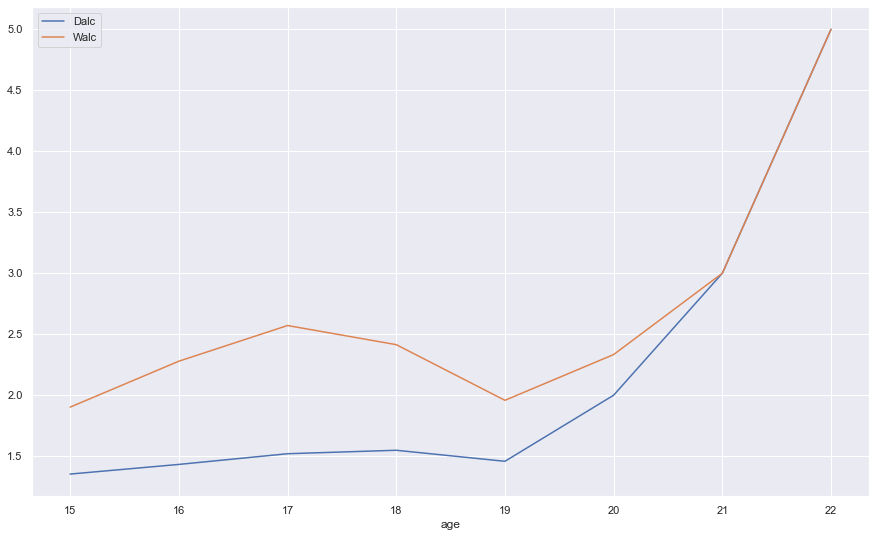

In [2]:
alcohol_consumption.groupby('age', as_index=False)[['Dalc', 'Walc']].aggregate('mean').plot.line(x='age')


### Consumo de álcool por sexo

Gráfico do nível consumo de álcool - de 1 (muito baixo) a 5 (muito alto) - para o sexo feminino e masculino.

<AxesSubplot:xlabel='sex'>

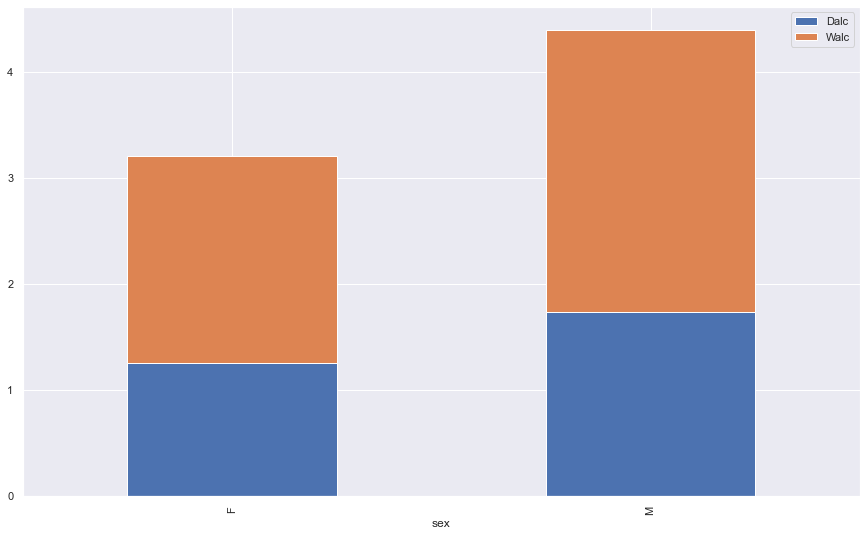

In [3]:
alcohol_consumption.groupby('sex')[['Dalc', 'Walc']].aggregate('mean').plot.bar(by='sex', stacked=True)

### Idade dos envolvidos

Gráfico para o intervalo de idade dos participantes.

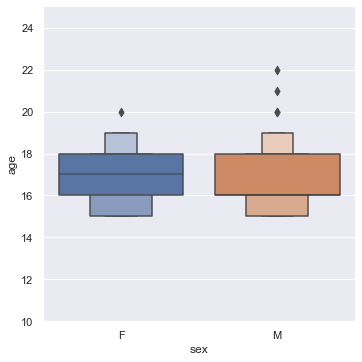

In [4]:
ax = sns.catplot(x="sex", y="age",
            kind="boxen", data=alcohol_consumption)

# Limita os valores dos eixos
ax.set(ylim=(10, 25))

plt.show()

### Consumo de álcool por status de coabitação dos pais

Boxplots no consumo de álcool em dias de semana e finais e semana tanto para pais separados (A) e que moram juntos (T).

array([<AxesSubplot:title={'center':'Dalc'}, xlabel='Pstatus'>,
       <AxesSubplot:title={'center':'Walc'}, xlabel='Pstatus'>],
      dtype=object)

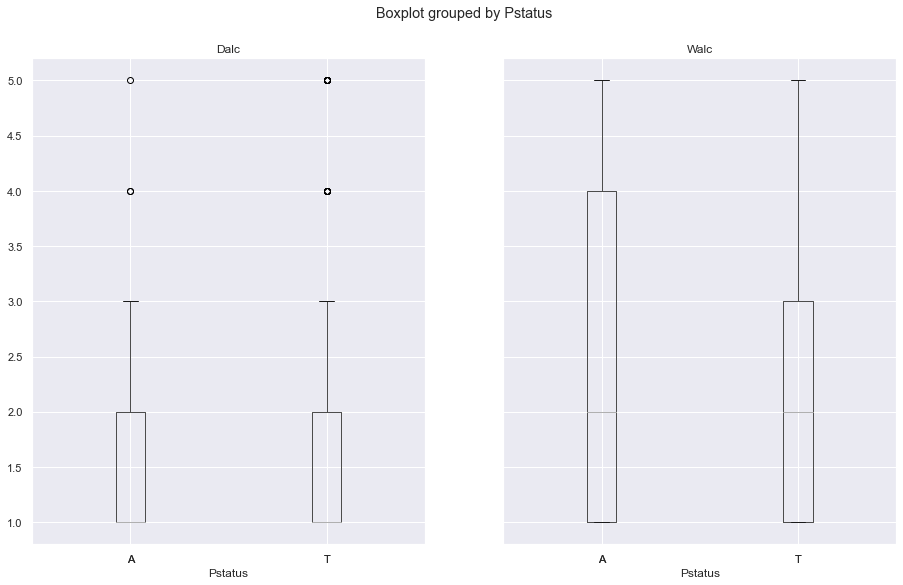

In [5]:
# Boxplot dos valores
alcohol_consumption.boxplot(column=['Dalc', 'Walc'], by='Pstatus')

Comparação da média de consumo de álcool entre alunos com pais que moram juntos ou separados, para consumo em dias da semana e finais de semana.

<AxesSubplot:xlabel='Pstatus'>

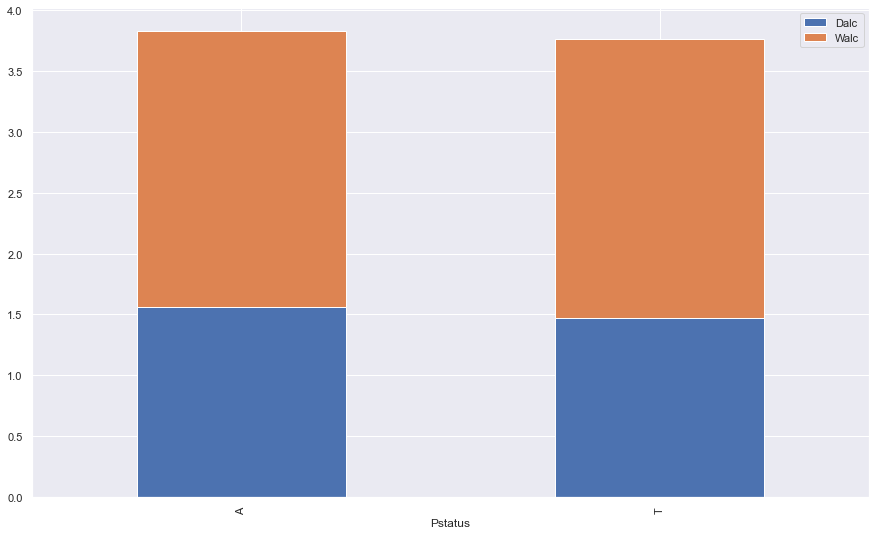

In [6]:
# Gráfico de barras com a média para consumos 
alcohol_consumption.groupby('Pstatus')[['Dalc', 'Walc']].aggregate('mean').plot.bar(by='Pstatus', stacked=True)

### Consumo de álcool para frequência que um aluno sai com os amigos

Para cada nível de frequência que um aluno sai com seus amigos, verificamos a distribuição do consumos de álcool entre os alunos que se encaixam no grupo através de um boxplot.

array([<AxesSubplot:title={'center':'Dalc'}, xlabel='goout'>,
       <AxesSubplot:title={'center':'Walc'}, xlabel='goout'>],
      dtype=object)

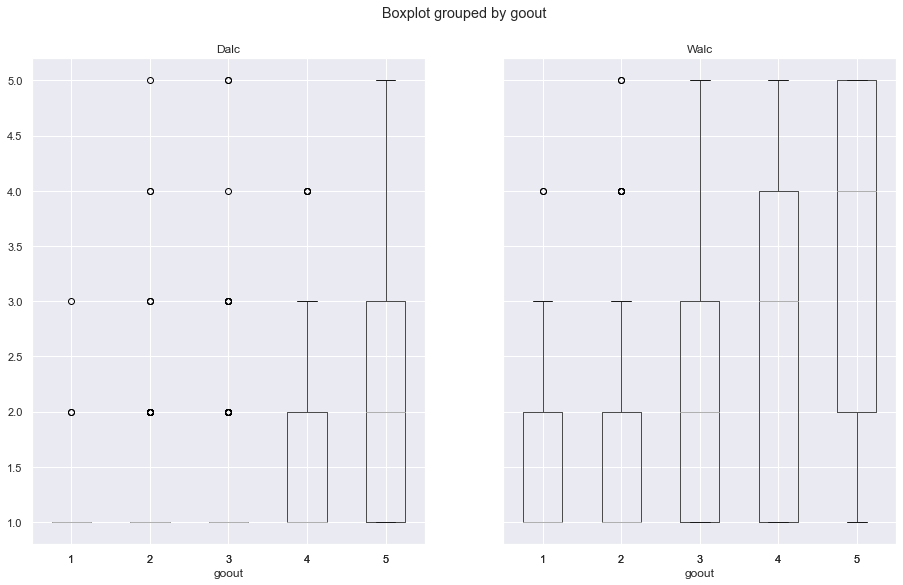

In [7]:
alcohol_consumption.boxplot(column=['Dalc', 'Walc'], by='goout')

Verificamos como a média do consumo de álcool varia em relação a quanto um aluno sai com seus amigos.

<AxesSubplot:xlabel='goout'>

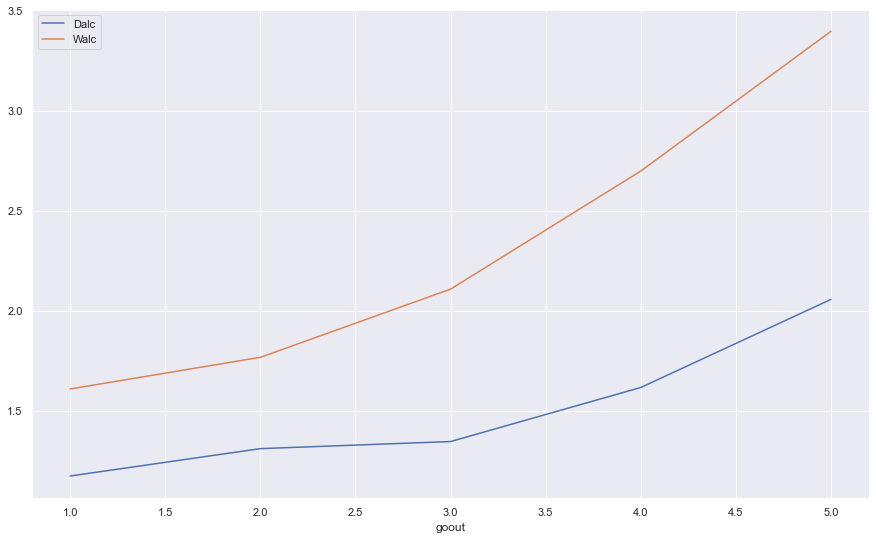

In [8]:
alcohol_consumption.groupby('goout', as_index=False)[['Dalc', 'Walc']].aggregate('mean').plot.line(x='goout')

...

## Testes de Hipótese e Intervalo de Confiança

In [9]:
matplotlib.rcParams['figure.figsize'] = (15.0, 9.0)
alcohol_consumption = pd.read_csv('../databases/student-mat.zip', compression='zip')

# Teste 1

Desejamos testar se há uma diferença significativa nas notas dos alunos que consomem álcool de 1-2 dias e dos que consomem a partir de 3 dias na semana, a um nível de significância de 5%.

**Raciocínio:** 
- 1 - Definir as hipóteses nula e alternativa.
- 2 - Encontrar a estatística de teste.
- 3 - Resampling/Shuffle de acordo com a hipótese nula.
- 4 - Encontrar os valores crítios/calcular o p-valor.
- 5 - Concluir (rejeitar ou não a hipótese).

    #### H0: μ1-2 = μ>=3

    #### H1: μ1-2 ≠ μ>=3 

        Ou ainda

    #### H0: μ1-2 − μ>=3 = 0 

    #### H1: μ1-2 − μ>=3 ≠ 0

Hipótese nula: Média de notas dos alunos que consomem álcool de 1-2 dias é igual à dos que consomem a partir de 3 dias na semana

Hipótese alternativa: Média de notas dos alunos que consomem álcool de 1-2 dias é diferente à dos que consomem a partir de 3 dias na semana

<AxesSubplot:xlabel='age', ylabel='G3'>

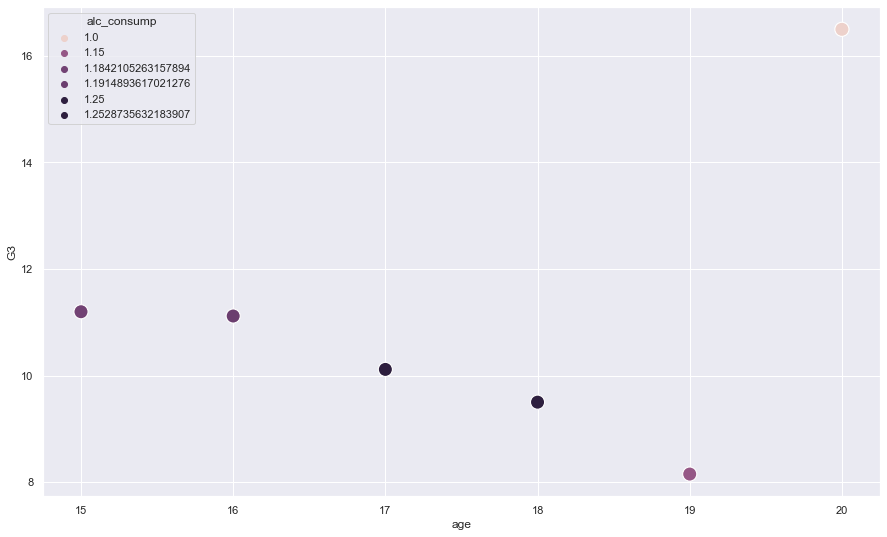

In [10]:
#Consumo ate 2 vezes na semana

df1 = alcohol_consumption[alcohol_consumption['Dalc'] < 3]
df1

df_1_2 = (df1.groupby('age')
              .agg({'G3': 'mean', 'Dalc': 'mean'}) 
              .reset_index()
              .rename(columns={'Dalc':'alc_consump'}))

df_1_2

sns.scatterplot(x='age', y='G3', hue = "alc_consump" , s = 200, data=df_1_2)

<AxesSubplot:xlabel='age', ylabel='G3'>

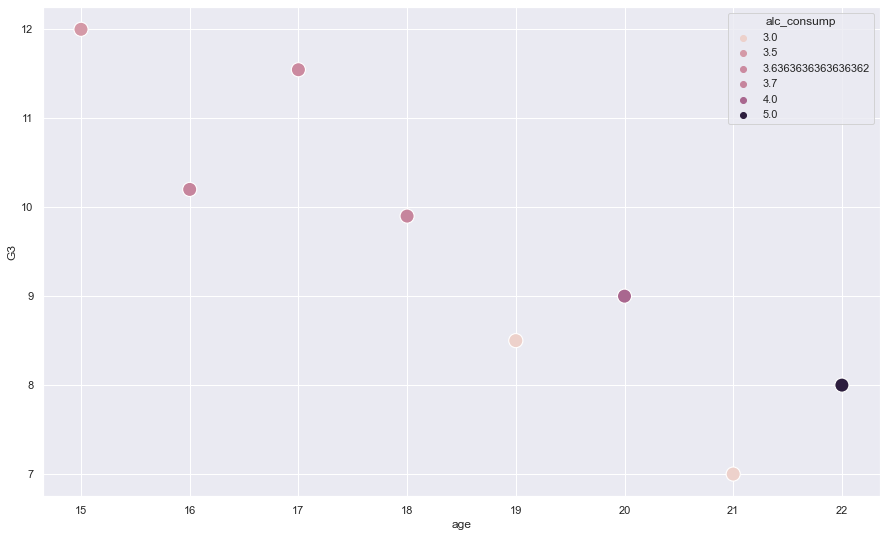

In [11]:
#Consumo de 3 a 5 vezes na semana

df2 = alcohol_consumption[alcohol_consumption['Dalc'] > 2]
df2

df_3_4_5 = (df2.groupby('age')
              .agg({'G3': 'mean', 'Dalc': 'mean'}) 
              .reset_index()
              .rename(columns={'Dalc':'alc_consump'}))

df_3_4_5

sns.scatterplot(x='age', y='G3', hue = "alc_consump" , s = 200, data=df_3_4_5)

### Conclusão 

__A abordagem do Teste de Hipótese demonstra que existe uma relação estatisticamente signifcante entre notas e consumo de álcool. Assim, rejeitamos a hipótese nula H0 .__

# Teste 2

Desejamos testar se há uma diferença significativa na média de faltas dos alunos que consomem álcool de 1-2 dias e dos que consomem a partir de 3 dias na semana, a um nível de significância de 5%.

#### H0: μ1-2 = μ>=3

#### H1: μ1-2 ≠ μ>=3 

    Ou ainda

#### H0: μ1-2 − μ>=3 = 0 

#### H1: μ1-2 − μ>=3 ≠ 0

Hipótese nula: Média de faltas dos alunos que consomem álcool de 1-2 dias é igual à dos que consomem a partir de 3 dias na semana

Hipótese alternativa: Média de faltas dos alunos que consomem álcool de 1-2 dias é diferente à dos que consomem a partir de 3 dias na semana

<AxesSubplot:xlabel='age', ylabel='absences'>

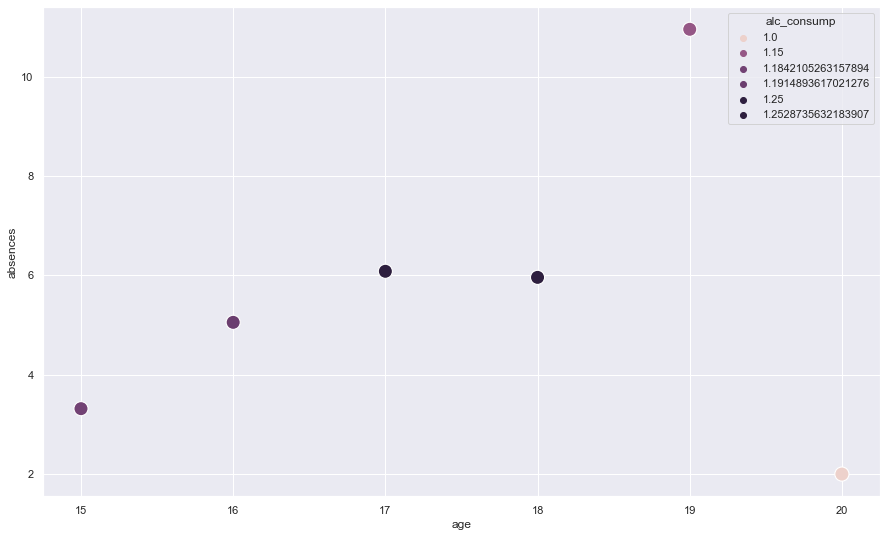

In [12]:
#Consumo de 1 a 2 vezes
df1_t2 = alcohol_consumption[alcohol_consumption['Dalc'] < 3]
df1_t2

df_1_2_t2 = (df1_t2.groupby('age')
              .agg({'absences': 'mean', 'Dalc': 'mean'}) 
              .reset_index()
              .rename(columns={'Dalc':'alc_consump'}))

df_1_2_t2

sns.scatterplot(x='age', y='absences', hue = "alc_consump" , s = 200, data=df_1_2_t2)

<AxesSubplot:xlabel='age', ylabel='absences'>

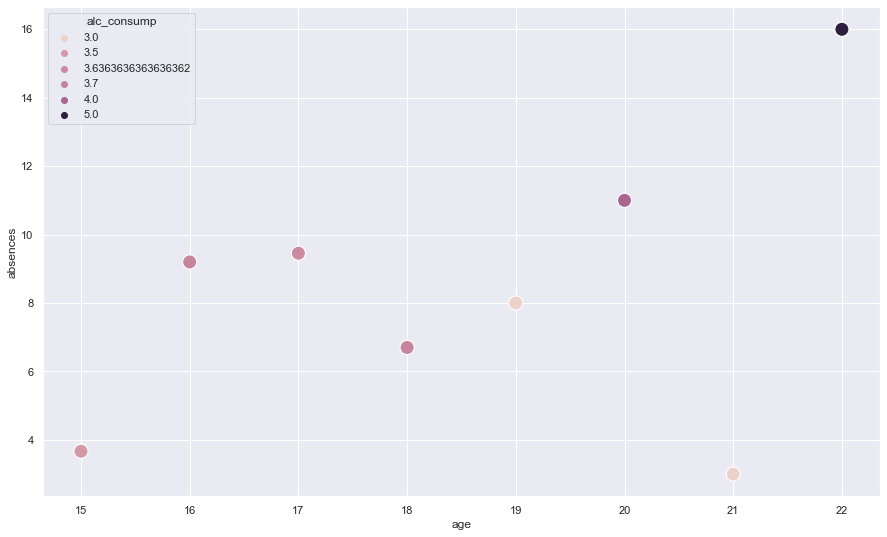

In [13]:
#Consumo de 3 a 5 vezes
df2_t2 = alcohol_consumption[alcohol_consumption['Dalc'] > 2]
df2_t2

df_3_4_5_t2 = (df2_t2.groupby('age')
              .agg({'absences': 'mean', 'Dalc': 'mean'}) 
              .reset_index()
              .rename(columns={'Dalc':'alc_consump'}))

df_3_4_5_t2

sns.scatterplot(x='age', y='absences', hue = "alc_consump" , s = 200, data=df_3_4_5_t2)

([<matplotlib.axis.YTick at 0x1a640456df0>,
 [Text(0, 0, '1 a 2'), Text(0, 1, '>= 3')])

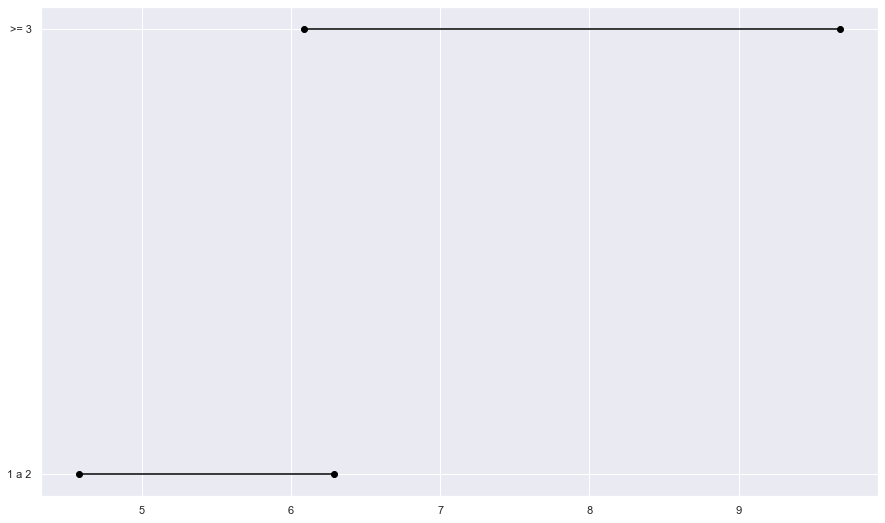

In [14]:
#Plotando visualização dos intervalos de confiança

data_dict = {}
data_dict['DALC'] = ['1 a 2','>= 3']
data_dict['INFERIOR'] = [4.58,6.09]
data_dict['SUPERIOR'] = [6.29,9.68]
dataset = pd.DataFrame(data_dict)

for INFERIOR,SUPERIOR,y in zip(dataset['INFERIOR'],dataset['SUPERIOR'],range(len(dataset))):
    plt.plot((INFERIOR,SUPERIOR),(y,y),'ro-',color='black')
plt.yticks(range(len(dataset)),list(dataset['DALC']))

### Conclusão 

__A abordagem do Teste de Hipótese demonstra que existe uma relação estatisticamente signifcante entre frequência nas aulas e consumo de álcool. Assim, rejeitamos a hipótese nula H0 .__

# Teste 3

Desejamos testar se há uma diferença significativa na média de tempo de estudo dos alunos que consomem álcool de 1-2 dias e dos que consomem a partir de 3 dias na semana, a um nível de significância de 5%.

#### H0: μ1-2 = μ>=3

#### H1: μ1-2 ≠ μ>=3 

    Ou ainda

#### H0: μ1-2 − μ>=3 = 0 

#### H1: μ1-2 − μ>=3 ≠ 0

Hipótese nula: Média de tempo de estudo dos alunos que consomem álcool de 1-2 dias é igual à dos que consomem a partir de 3 dias na semana

Hipótese alternativa: Média de tempo de estudo dos alunos que consomem álcool de 1-2 dias é diferente à dos que consomem a partir de 3 dias na semana

<AxesSubplot:xlabel='age', ylabel='studytime'>

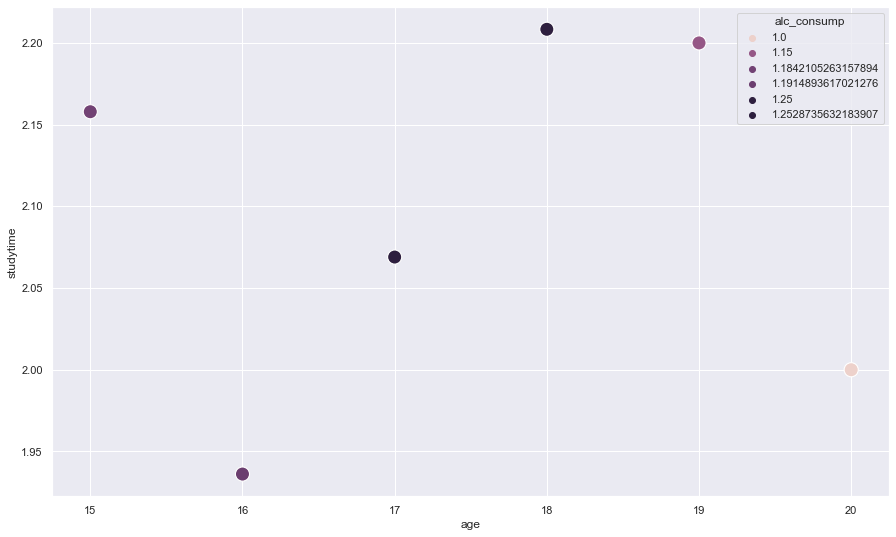

In [15]:
#Consumo de 1 a 2 vezes
df1_t3 = alcohol_consumption[alcohol_consumption['Dalc'] < 3]
df1_t3

df_1_2_t3 = (df1_t3.groupby('age')
              .agg({'studytime': 'mean', 'Dalc': 'mean'}) 
              .reset_index()
              .rename(columns={'Dalc':'alc_consump'}))

df_1_2_t3

sns.scatterplot(x='age', y='studytime', hue = "alc_consump" , s = 200, data=df_1_2_t3)

<AxesSubplot:xlabel='age', ylabel='studytime'>

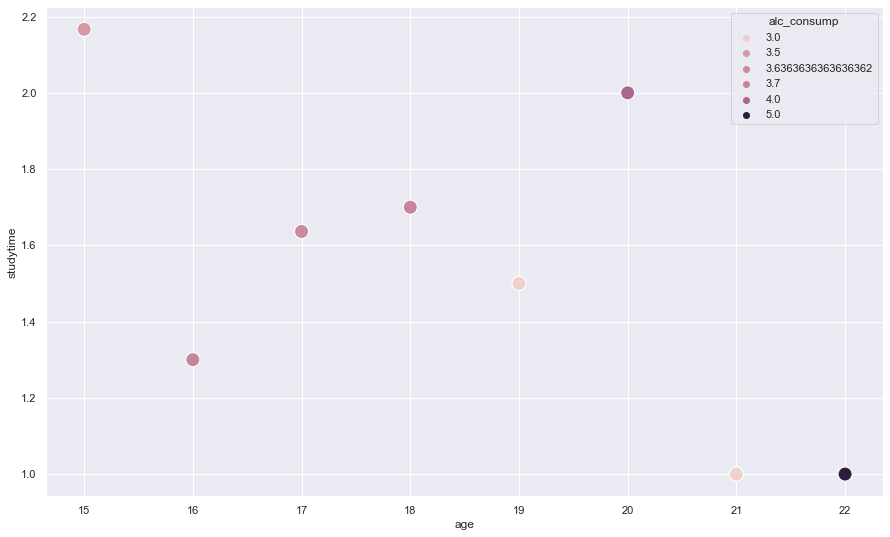

In [16]:
#Consumo de 3 a 5 vezes
df2_t3 = alcohol_consumption[alcohol_consumption['Dalc'] > 2]
df2_t3

df_3_4_5_t3 = (df2_t3.groupby('age')
              .agg({'studytime': 'mean', 'Dalc': 'mean'}) 
              .reset_index()
              .rename(columns={'Dalc':'alc_consump'}))

df_3_4_5_t3

sns.scatterplot(x='age', y='studytime', hue = "alc_consump" , s = 200, data=df_3_4_5_t3)

([<matplotlib.axis.YTick at 0x1a640d68ac0>,
 [Text(0, 0, '1 a 2'), Text(0, 1, '>= 3')])

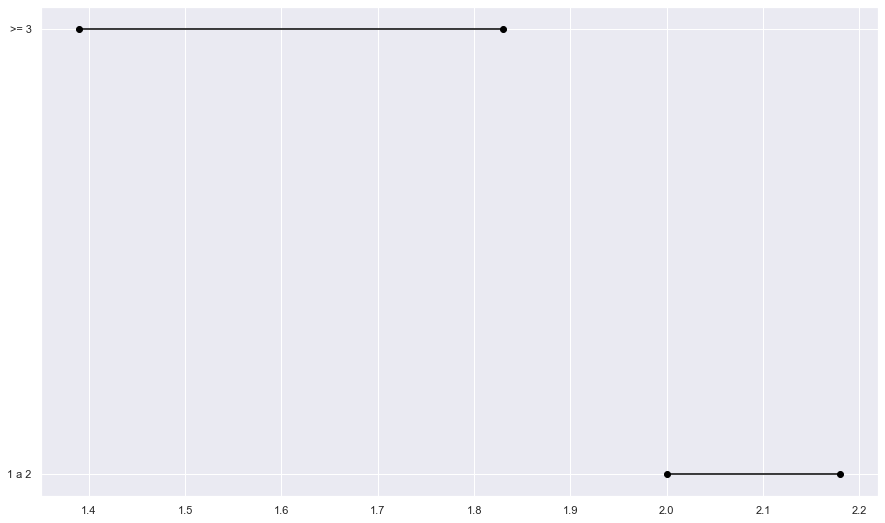

In [17]:
#Plotando visualização dos intervalos de confiança

data_dict = {}
data_dict['DALC'] = ['1 a 2','>= 3']
data_dict['INFERIOR'] = [2.0,1.39]
data_dict['SUPERIOR'] = [2.18,1.83]
dataset = pd.DataFrame(data_dict)

for INFERIOR,SUPERIOR,y in zip(dataset['INFERIOR'],dataset['SUPERIOR'],range(len(dataset))):
    plt.plot((INFERIOR,SUPERIOR),(y,y),'ro-',color='black')
plt.yticks(range(len(dataset)),list(dataset['DALC']))

### Conclusão 

__A abordagem do Teste de Hipótese demonstra que existe uma relação estatisticamente signifcante entre tempo de estudo e consumo de álcool. Assim, rejeitamos a hipótese nula H0 .__

# Regressão Linear e Logística


### Mais detalhes sobre elas podem ser encontrados nos arquivos notebooks/logistic_regression.ipynb e notebooks/linear_regression.ipynb